<a href="https://colab.research.google.com/github/Bitang-Melyen-Tanulok/Csip_Csip/blob/main/Saving_spectrograms_to_disk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/DeepLearning'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We could randomly choose 5-second-long parts in every iteration (epoch), but that'd most likely skip most of the important data from the recordings.

Function for converting the input audio to a Fourier-transformed spectrograms, than padding/clipping it's first dimension to 2048

In [25]:
# Turns audio to spectrograms and saves them to the given folder
def save_spectrogram_to_disk(path_to_audio, path_to_spectrogram_ogg, sample_duration_sec=5.0, hop_length_sec=2.5):
  audio_data, audio_rate = librosa.load(path_to_audio)

  sample_duration_frames = int(sample_duration_sec * audio_rate)
  hop_length_frames = int(hop_length_sec * audio_rate)

  n_fft = 2048
  hop_length = 512
  n_mels = 250
  # win_length is automatically equal to n_fft

  # Pad audio with zeros if smaller than sample_duration_sec
  if len(audio_data) < sample_duration_frames:
    audio_data = librosa.util.fix_length(audio_data, size=sample_duration_frames)

  # Divide the audio into sample_duration_sec seconds long samples
  for i, sample_start in tqdm(enumerate(range(0, len(audio_data), hop_length_frames))):
    sample_end = min(sample_start+sample_duration_frames, len(audio_data)-1)
    sample = audio_data[sample_start:sample_end]

    # If the sample is the remainder of dividing the audio, thus smaller than the sample duration sould be, we discard the sample
    # The end of the audio containing crucial data is highly unlikely
    if len(sample) < sample_duration_frames:
      continue

    # Generate mel spectrogram
    S = librosa.feature.melspectrogram(
        y=sample,
        sr=audio_rate,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels
    )

    # Convert to decibel scale
    S_db = librosa.power_to_db(S, ref=np.max)

    # Convert spectrogram into an image
    # img = librosa.display.specshow(S_db, sr=audio_rate, x_axis='time', y_axis='mel')

    spectrogram_file_path = path_to_spectrogram_ogg.split('.')[0]+f'_{i}.png'

    plt.figure(figsize=(4, 4))
    plt.axis('off')
    plt.imshow(S_db, aspect='auto', origin='lower', cmap='viridis')
    plt.savefig(spectrogram_file_path, bbox_inches='tight', pad_inches=0)
    plt.close()

Save 5 second long spectrograms to the disk (Google Drive) as pictures

current folder: blrwar1


57it [00:12,  4.47it/s]
51it [00:11,  4.58it/s]
64it [00:14,  4.51it/s]
58it [00:12,  4.81it/s]
1it [00:00,  2.05it/s]


KeyboardInterrupt: 

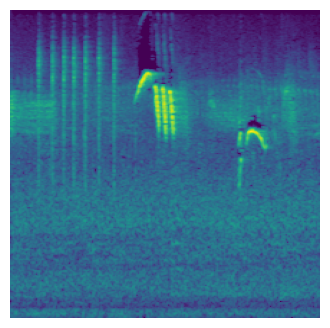

In [26]:
folders = os.listdir(path+'/sample_train_audio')

for j, folder in enumerate(folders):
  if (j >= 5): break # for now, we only create spectrograms for audio in the first 5 folders

  print("current folder:", folder)
  folder_path = path+'/sample_train_audio/'+folder+'/'

  spectrogram_folder_path = path+'/sample_train_spectrograms/'+folder+'/'
  if not os.path.exists(spectrogram_folder_path):
    os.makedirs(spectrogram_folder_path)

  files = os.listdir(folder_path)

  for i, file in enumerate(files):
    if (i >= 20): break # for now, we only look at the first 20 elements of a folder (maximum)
    save_spectrogram_to_disk(folder_path+file, spectrogram_folder_path+file)